In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import pandas as pd 
import tme1
from sklearn.base import BaseEstimator, DensityMixin


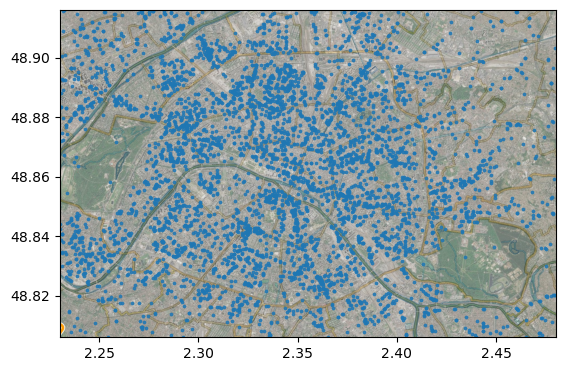

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import pandas as pd


POI_FILENAME = "data/poi-paris.pkl"
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')
## coordonnees GPS de la carte
xmin, xmax = 2.23, 2.48  # coord_x min et max
ymin, ymax = 48.806, 48.916  # coord_y min et max
coords = [xmin, xmax, ymin, ymax]


class Density(object):
    def fit(self,data):
        pass
    def predict(self,data):
        pass
    def score(self,data):
        #A compléter : retourne la log-vraisemblance
        ll = 0
        for d in data:
            ll += np.log(self.predict(d) + 1e-10)
        return ll

class Histogramme(Density, BaseEstimator, DensityMixin): #seul moyen pour que ce soit compatiible avec le cross validation
    def __init__(self,steps=10):
        Density.__init__(self)
        self.steps = steps
        self.density = None
        self.edges = None

    def to_bin(self, x, index):
        indice = np.searchsorted(self.edges[index], x) 
        return np.clip(indice - 1, 0, len(self.edges[index]) - 2)
    
    def fit(self,x, y=None):
        #A compléter : apprend l'histogramme de la densité sur x
        self.density, self.edges = np.histogramdd(x, bins=self.steps, density=True)
        return self
        
    def predict(self,x):
        #A compléter : retourne la densité associée à chaque point de x
        return self.density[self.to_bin(x[:,0], 0), self.to_bin(x[:,1], 1)]

class KernelDensity(Density):
    def __init__(self,kernel=None,sigma=0.1):
        Density.__init__(self)
        self.kernel = kernel
        self.sigma = sigma
    def fit(self,x):
        self.x = x
    def predict(self,data):
        #A compléter : retourne la densité associée à chaque point de data
        pass

def get_density2D(f,data,steps=100):
    """ Calcule la densité en chaque case d'une grille steps x steps dont les bornes sont calculées à partir du min/max de data. Renvoie la grille estimée et la discrétisation sur chaque axe.
    """
    xmin, xmax = data[:,0].min(), data[:,0].max()
    ymin, ymax = data[:,1].min(), data[:,1].max()
    xlin,ylin = np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps)
    xx, yy = np.meshgrid(xlin,ylin)
    grid = np.c_[xx.ravel(), yy.ravel()]
    res = f.predict(grid).reshape(steps, steps)
    return res, xlin, ylin

def show_density(f, data, steps=100, log=False):
    """ Dessine la densité f et ses courbes de niveau sur une grille 2D calculée à partir de data, avec un pas de discrétisation de steps. Le paramètre log permet d'afficher la log densité plutôt que la densité brute
    """
    res, xlin, ylin = get_density2D(f, data, steps)
    xx, yy = np.meshgrid(xlin, ylin)
    plt.figure()
    show_img()
    if log:
        res = np.log(res+1e-10)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.8, s=3)
    show_img(res)
    plt.colorbar()
    plt.contour(xx, yy, res, 20)


def show_img(img=parismap):
    """ Affiche une matrice ou une image selon les coordonnées de la carte de Paris.
    """
    origin = "lower" if len(img.shape) == 2 else "upper"
    alpha = 0.3 if len(img.shape) == 2 else 1.
    plt.imshow(img, extent=coords, aspect=1.5, origin=origin, alpha=alpha)
    ## extent pour controler l'echelle du plan


def load_poi(typepoi,fn=POI_FILENAME):
    """ Dictionaire POI, clé : type de POI, valeur : dictionnaire des POIs de ce type : (id_POI, [coordonnées, note, nom, type, prix])
    
    Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, 
    clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
    """
    poidata = pickle.load(open(fn, "rb"))
    data = np.array([[v[1][0][1],v[1][0][0]] for v in sorted(poidata[typepoi].items())])
    note = np.array([v[1][1] for v in sorted(poidata[typepoi].items())])
    return data,note
    

plt.ion()
# Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
# La fonction charge la localisation des POIs dans geo_mat et leur note.
geo_mat, notes = load_poi("bar")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)

In [7]:
POI_FILENAME = "data/poi-paris.pkl"
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')
## coordonnees GPS de la carte
xmin, xmax = 2.23, 2.48  # coord_x min et max
ymin, ymax = 48.806, 48.916  # coord_y min et max
coords = [xmin, xmax, ymin, ymax]
image = './data/paris-48.806-2.23--48.916-2.48'

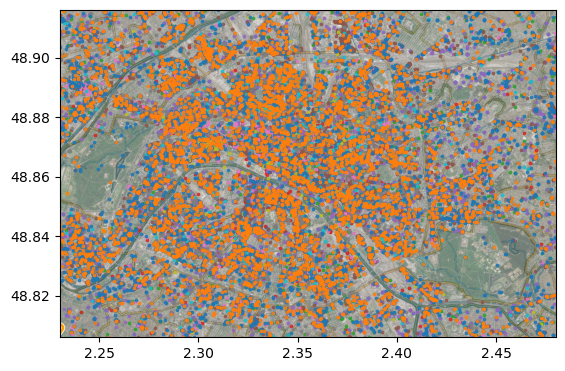

In [10]:
plt.ion()
# Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
# La fonction charge la localisation des POIs dans geo_mat et leur note.
poi_list = ["furniture_store", "laundry", "bakery", "cafe", "home_goods_store", "clothing_store", "atm", "lodging", "night_club", "convenience_store", "restaurant", "bar"]

geo_mat = []
notes = []
for poi in poi_list:
    x, y = tme1.load_poi(poi)
    geo_mat.append(x)
    notes.append(y)

# Affiche la carte de Paris
show_img()
# Affiche les POIs
for i in geo_mat:
    plt.scatter(i[:,0],i[:,1],alpha=0.8,s=3)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

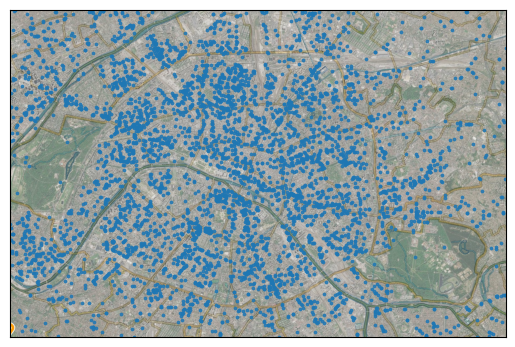

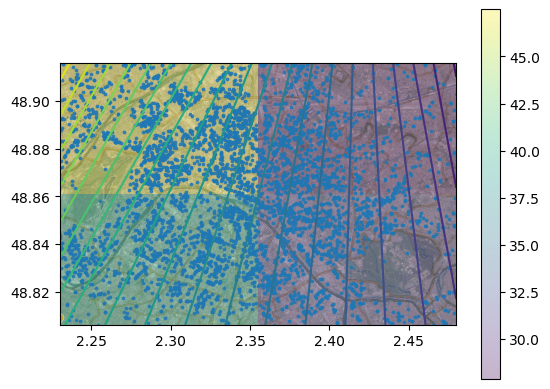

In [16]:
geo_mat, notes = load_poi("bar")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)
plt.xticks([])
plt.yticks([])

for steps in [2, 5, 10, 15, 20, 30, 40]:
    nc_hist = Histogramme(steps)
    nc_hist.fit(geo_mat)
    nc_hist.predict(geo_mat)
    show_density(nc_hist, geo_mat, steps)
    plt.gca().set_title(f'Number of bins : {steps}, score : {nc_hist.score(geo_mat)}')